<a href="https://colab.research.google.com/github/hunterblum/MLFinal/blob/main/Group2_ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real vs. Fake Job Classification
Modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import seaborn as sns

Import original data set

In [4]:
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


Read in uploaded data

In [5]:
Job = pd.read_csv('fake_job_postings.csv')
Job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## EDA
### Structure of Data
Shape

In [ ]:
Job.shape

(17880, 18)

NAs by feature

In [6]:
Job.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

NAs by row

In [7]:
NA_row = []
for i in range(len(Job.index)):
  na_temp = Job.iloc[i].isnull().sum()
  NA_row.append({'row': i+1, 'NAs': na_temp})

NA_row = pd.DataFrame(NA_row)
NA_row = NA_row.sort_values('NAs', ascending=False)
NA_row

,row,NAs
11077,11078,11
144,145,11
16627,16628,11
17756,17757,11
2315,2316,11
...,...,...
15825,15826,0
11435,11436,0
11441,11442,0
15789,15790,0


Fill NAs with " " so our strings don't delete when combined

In [8]:
Job.fillna(" ", inplace = True)

## Creating Text Dataset


In [9]:
Job_corpus = Job.drop(columns=['title', 'location', 'company_profile', 'description', 'requirements', 'benefits'])
Job_corpus['corpus'] = Job['title'] + ' ' + Job['location'] + ' ' + Job['department'] + ' ' + Job['company_profile'] + ' ' + Job['description'] + ' ' + Job['requirements'] + ' ' + Job['benefits'] + ' ' + Job['employment_type'] + ' ' + Job['required_education'] + ' ' + Job['industry'] + ' ' + Job['function']

### Cleaning the corpus variable
Lowercase

In [19]:
Job_corpus['corpus'] = Job_corpus['corpus'].str.lower()

Remove unicode characters

In [20]:
corpus_uni = []
for ind in Job_corpus.index:
  x = Job_corpus['corpus'][ind]
  temp = x.encode('ascii', 'ignore').decode()
  corpus_uni.append(temp)

Job_corpus['corpus'] = corpus_uni


Remove Stop words

In [23]:
stop = stopwords.words("english")
corpus_stop = []
for ind in Job_corpus.index:
  x = Job_corpus['corpus'][ind]
  temp = ' '.join([word for word in x.split(' ') if word not in stop])
  corpus_stop.append(temp)

Job_corpus['corpus'] = corpus_stop

Run Vectorizer

In [24]:
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(Job_corpus['corpus'])
feat_names = vectorizer.get_feature_names()
Job_corpus = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
Job_corpus

,00,000,0000,0001pt,0005,000a,000aed,000annual,000apply,000applying,...,zurich,zus,zusammen,zusammenarbeitest,zusammenbringt,zutrifft,zweig,zylun,zyluns,zynga
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.080592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.0,0.027459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17876,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17877,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


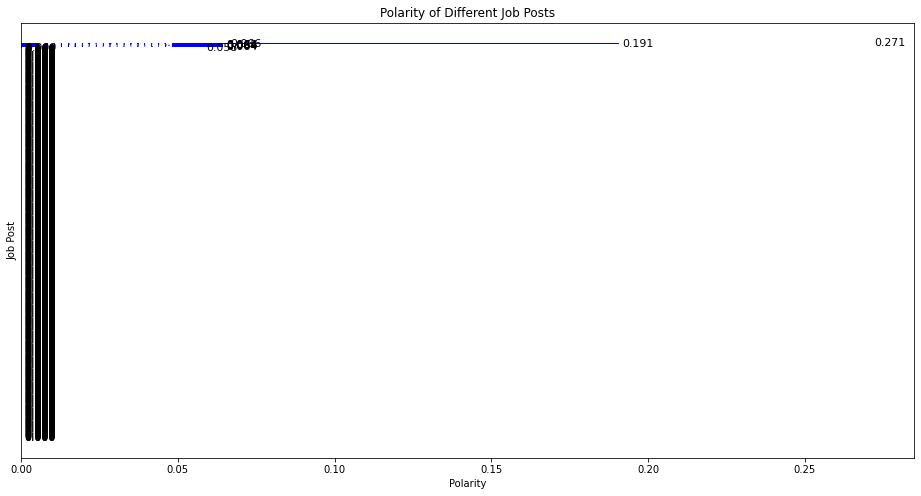

In [30]:
product_polarity_sorted=pd.DataFrame(Job_corpus.groupby('name')['corpus'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Job Post')
plt.title('Polarity of Different Job Posts')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['corpus'],color='blue',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['corpus']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

Got this from: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

Not sure if we want to keep it...unless we can make it work...